In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("~/Downloads/Adops & Data Scientist Sample Data - Q2 Regression.csv")
df.columns = ['X1','X2','Y']
print("DF shape:", df.shape)
df.head(4)

DF shape: (299, 3)


,X1,X2,Y
0,-1.410,-1.23,11.80
1,0.943,4.51,-3.24
2,3.570,5.07,-23.90
3,-1.700,6.91,-22.10


In [3]:
df.describe()

,X1,X2,Y
count,299.000000,299.000000,299.000000
mean,2.323120,2.020449,-41.742393
std,5.703811,3.001011,582.217316
min,-8.860000,-2.890000,-10000.000000
25%,-1.950000,-0.613500,-23.550000
50%,0.447000,1.940000,-3.240000
75%,7.045000,4.705000,16.300000
max,20.600000,7.000000,202.000000


In [4]:
# Check for missing values
df.isnull().values.any()

False

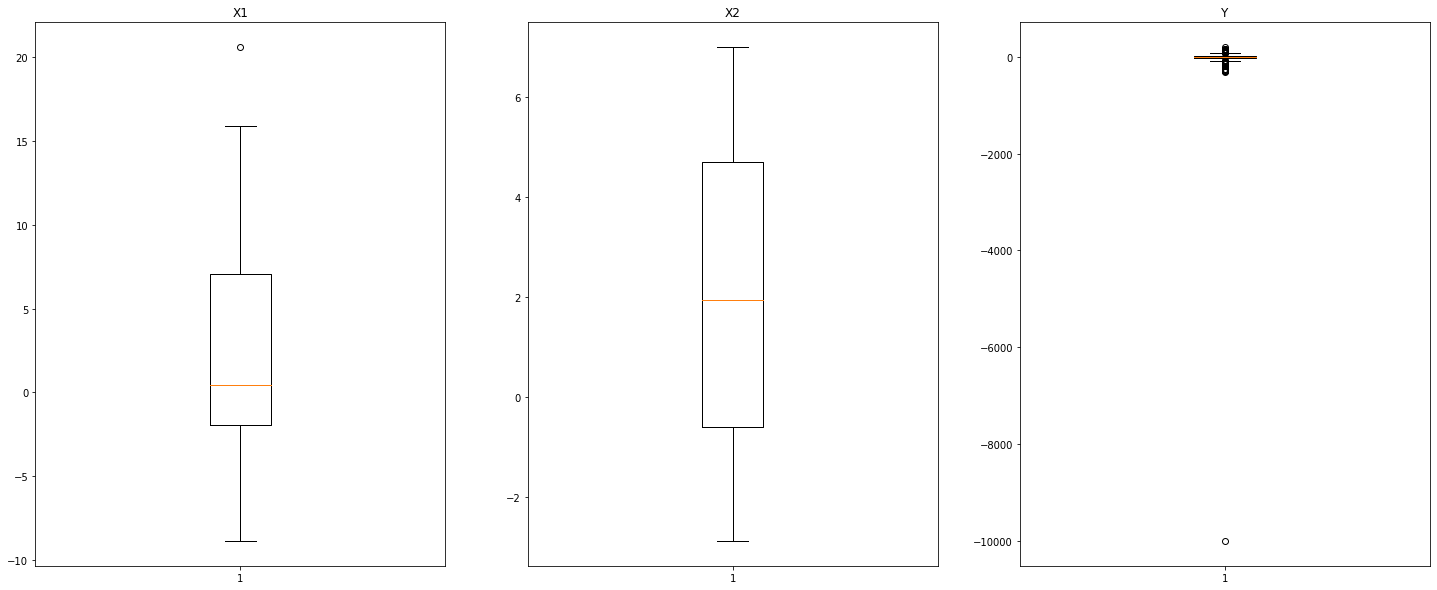

In [5]:
# Box blot
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
plt.boxplot(df.X1)
plt.title('X1')

plt.subplot(1, 3, 2)
plt.boxplot(df.X2)
plt.title('X2')

plt.subplot(1, 3, 3)
plt.boxplot(df.Y)
plt.title('Y')
plt.show()

In [6]:
# Y column has one outlier in min side so removing that
df_clean = df[df.Y != df.Y.min()]
df_clean.shape

(298, 3)

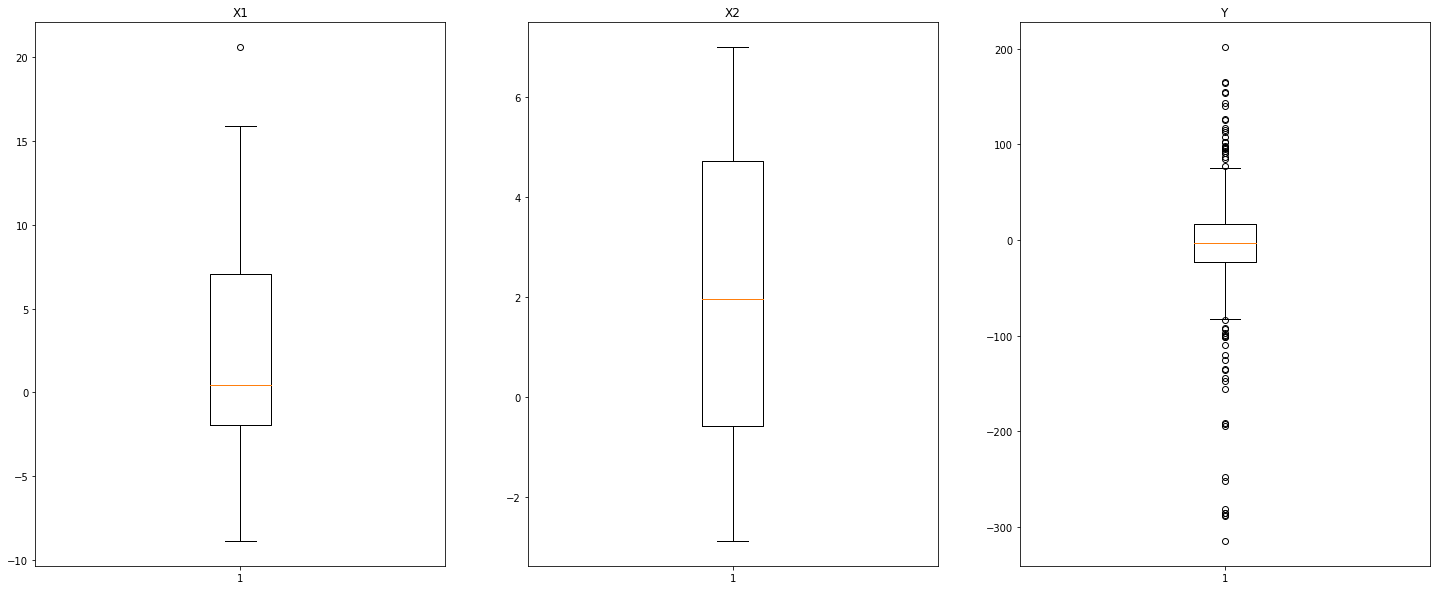

In [7]:
# Box blot
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean.X1)
plt.title('X1')

plt.subplot(1, 3, 2)
plt.boxplot(df_clean.X2)
plt.title('X2')

plt.subplot(1, 3, 3)
plt.boxplot(df_clean.Y)
plt.title('Y')
plt.show()

### Q2. Please build a good regression model which explains column C by a function of  A and B. 


Building a Linear regression model:

$$Y = \beta_0 + \beta_1 X1 + \beta_2 X2$$

<center>or</center> 

$$Y = \beta ^ T X$$

$$ where, X = [1, X1, X2] ; \beta = [\beta_0, \beta_1, \beta_2]  $$



cost function I want to minimize is:

$$J(\beta) = \frac{1}{2n} \sum_{i=1}^n(\beta^T x^{(i)}-y^{(i)})^2$$ 

I used Gradient descent for finding best $\beta$ that minimized the cost function:

For $\alpha$ learning rate it updates weight as following (until convergence)

<center> $\beta_i$ = $\beta_i - \alpha \frac{\partial}{\partial\beta_i}J(\beta)$.</center>



In [8]:
def cost_function(X,y,beta):
    n = len(X)
    residuals = np.dot(X,beta.T)-y
    sum_of_squared_residuals = np.sum(np.power(residuals, 2))
    J = sum_of_squared_residuals/(2*n)
    return J

def gradient_descent(X, y, beta, n, alpha):
    costs = np.zeros(n)
    for i in range(n):
        residuals = np.dot(X,beta.T)-y
        beta = beta - (alpha/len(X)) * np.sum(X * residuals, axis = 0)
        costs[i] = cost_function(X, y, beta) # update cost 
    return beta, costs


In [9]:
# Create training data

X = df_clean.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = df_clean.iloc[:,2:3].values 

In [10]:
# weights
beta = np.zeros([1,3]) # initialize with 0

# hyperparameters
alpha = 0.01 # learning rate
n = 500      # number of iterations

In [11]:
trained_beta, costs = gradient_descent(X, y , beta, n, alpha)

Text(0, 0.5, 'cost')

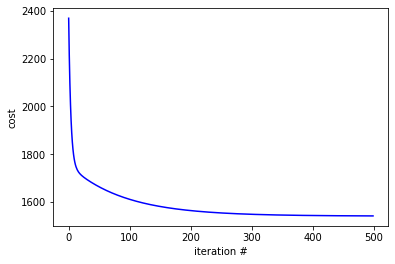

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(n), costs, 'b')
ax.set_xlabel('iteration #')  
ax.set_ylabel('cost')  

In [13]:
print(trained_beta)

[[ 24.12347101  -1.27617718 -14.97149634]]


### Evaluation of model

In [14]:
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred)**2) / len(y))
    return rmse.item()


def r2_score(y, y_pred):
    mean_y = np.mean(y)
    sst = sum((y - mean_y)**2)
    sse = sum((y - y_pred)**2)
    r2 = 1 - (sse / sst)
    return r2

In [15]:
y_pred = X.dot(trained_beta.T) # predicted Y

# RMSE
RMSE = rmse(y,y_pred)
print('RMSE:',RMSE)

# R squared error
r2 = r2_score(y,y_pred)
print('r2 score:',r2.item())

RMSE: 55.52704410539738
r2 score: 0.39371630786510325


### Extra: Quick validation with SKlearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X, y)
y_pred_sklearn = reg.predict(X)

# RMSE
mse = mean_squared_error(y, y_pred_sklearn)
rmse = mse ** 0.5

# R squared error
r2_sklearn = r2_score(y, y_pred_sklearn)
print('RMSE Sklearn:',RMSE)
print('r2 score Sklearn:',r2_sklearn)

RMSE Sklearn: 55.52704410539738
r2 score Sklearn: 0.39404197675579977


My implementation and SKLearn implmentation gives comparable results.